Populating the interactive namespace from numpy and matplotlib


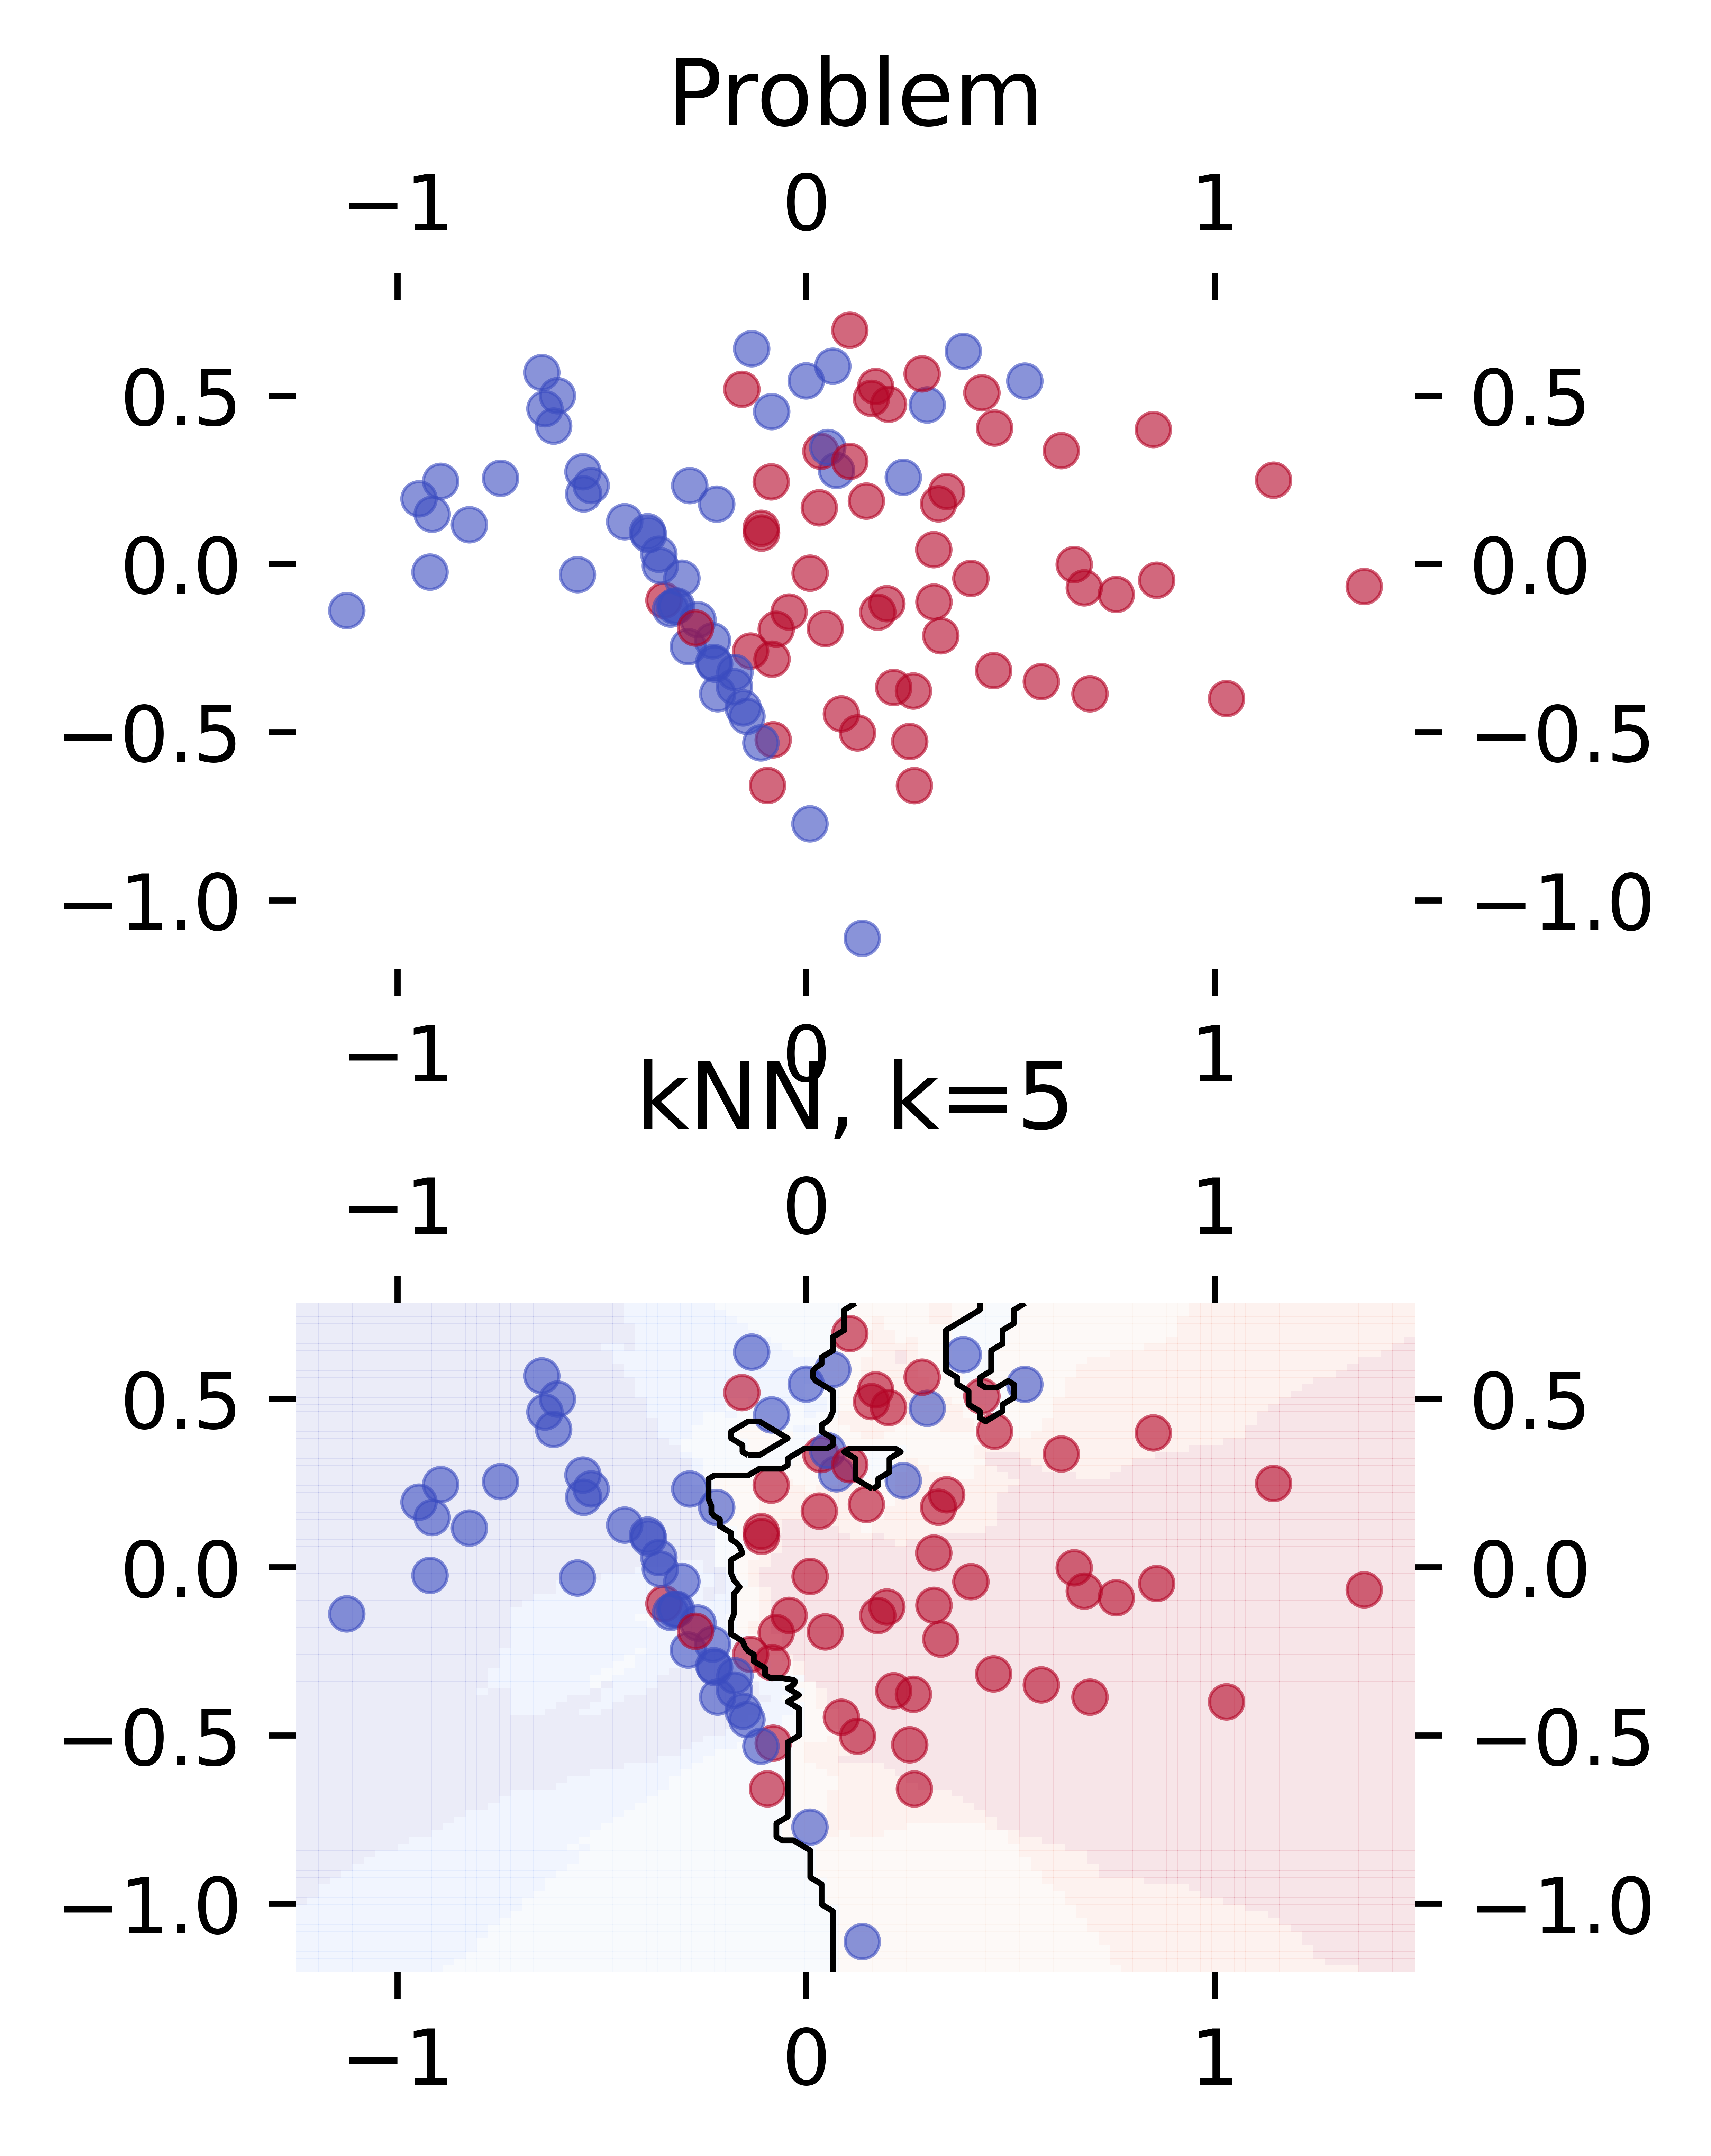

In [31]:
### Prepeare python
%pylab inline

import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as stats
import neurolab as nl
from sklearn.datasets import make_classification
from sklearn import neighbors, tree, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


### Helper functions for plotting
# A function to plot observations on scatterplot
def plotcases(ax):
    plt.scatter(xdf['x1'],xdf['x2'],c=xdf['y'], cmap=cm.coolwarm, axes=ax, alpha=0.6, s=20, lw=0.4)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', which='both', left='off', right='off', top='off', bottom='off', 
                   labelleft='off', labelright='off', labeltop='off', labelbottom='off')

# a function to draw decision boundary and colour the regions
def plotboundary(ax, Z):
    ax.pcolormesh(xx, yy, Z, cmap=cm.coolwarm, alpha=0.1)  
    ax.contour(xx, yy, Z, [0.5], linewidths=0.75, colors='k')


### Generate train data
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_repeated=0,
                           n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.02, class_sep=0.5, 
                           hypercube=True, shift=0.0, scale=0.5, shuffle=True, random_state=5)

xdf = pd.DataFrame(X, columns=['x1','x2'])
xdf['y'] = y


### create plot canvas with 6x4 plots
fig = plt.figure(figsize(12,16), dpi=1600) 
plt.subplots_adjust(hspace=.5)             

nrows = 7
ncols = 4
gridsize = (nrows, ncols)


### 1. plot the problem ###
ax0 = plt.subplot2grid(gridsize,[0,0])
plotcases(ax0)
ax0.title.set_text("Problem")

# take boundaries from first plot and define mesh of points for plotting decision spaces
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
nx, ny = 100, 100   # this sets the num of points in the mesh
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                     np.linspace(y_min, y_max, ny))


############# kNN #################
### 2. kNN with k=5
knn5 = neighbors.KNeighborsClassifier(n_neighbors=5)
knn5.fit(xdf[['x1','x2']], xdf['y']) 

Z = knn5.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:,1].reshape(xx.shape)

ax = plt.subplot2grid(gridsize, [1,0])
ax.title.set_text("kNN, k=5")
plotboundary(ax, Z)
plotcases(ax)

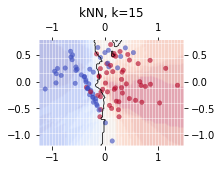

In [32]:
### 3. kNN with k=15
knn15 = neighbors.KNeighborsClassifier(n_neighbors=15)
knn15.fit(xdf[['x1','x2']], xdf['y']) 

Z = knn15.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:,1].reshape(xx.shape)

ax = plt.subplot2grid(gridsize,[1,1])
ax.title.set_text("kNN, k=15")
plotboundary(ax, Z)
plotcases(ax)


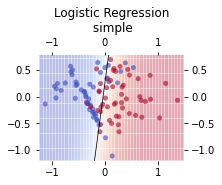

In [41]:
########### logistic regression ##########
### 4. Logistic regression - simple linear
formula = ('y ~ x1 + x2')
LRm = sm.GLM.from_formula(formula=formula, data=xdf, family=sm.families.Binomial()).fit()

XX = pd.DataFrame((vstack([xx.ravel(), yy.ravel()]).T))
XX.columns = xdf.columns[0:2]
Z = LRm.predict(XX)
Z = Z.values.reshape(xx.shape)

ax = plt.subplot2grid(gridsize, [2,0])
ax.title.set_text("Logistic Regression\n simple")
plotboundary(ax, Z)
plotcases(ax)

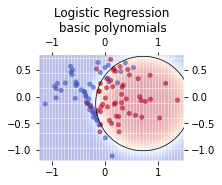

In [43]:
### 5. Logistic regression - with basic polynomials
formula = ('y ~ x1 + x2 + I(x1**2) + I(x2**2)')
LRm = sm.GLM.from_formula(formula=formula, data=xdf, family=sm.families.Binomial()).fit()

Z = LRm.predict(XX)
Z = Z.values.reshape(xx.shape)

ax = plt.subplot2grid(gridsize, [2,1])
ax.title.set_text("Logistic Regression\n basic polynomials")
plotboundary(ax, Z)
plotcases(ax)


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


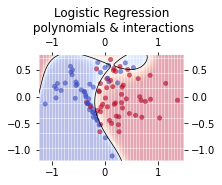

In [44]:
### 6. Logistic regression - with polynomials & interactions
formula = ('y ~ x1 + x2 + x1*x2 + I(x1**2) + I(x2**2) + x1*I(x1**2) + x2*I(x2**2)\
                                + I(x1**3) + I(x2**3) + x1*I(x1**3) + x2*I(x2**3)')
LRm = sm.GLM.from_formula(formula=formula, data=xdf, family=sm.families.Binomial()).fit()

Z = LRm.predict(XX)
Z = Z.values.reshape(xx.shape)

ax = plt.subplot2grid(gridsize, [2,2])
ax.title.set_text("Logistic Regression\n polynomials & interactions")
plotboundary(ax, Z)
plotcases(ax)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.42884873083473224
            Iterations: 77
            Function evaluations: 77
            Gradient evaluations: 77


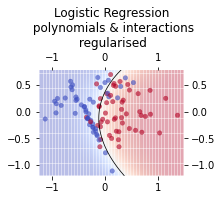

In [47]:
### 7. Logistic regression - with polynomials & interactions, regularised
# smaller alpha = weaker regularisation. 
formula = ('y ~ x1 + x2 + x1*x2 + I(x1**2) + I(x2**2) + x1*I(x1**2) + x2*I(x2**2)\
                                + I(x1**3) + I(x2**3) + x1*I(x1**3) + x2*I(x2**3)')
LRm = sm.Logit.from_formula(formula=formula, data=xdf).fit_regularized(alpha=0.5, maxiter = 200)

Z = LRm.predict(XX)
Z = Z.values.reshape(xx.shape)

ax = plt.subplot2grid(gridsize, [2,3])
ax.title.set_text("Logistic Regression\n polynomials & interactions\n regularised")
plotboundary(ax, Z)
plotcases(ax)



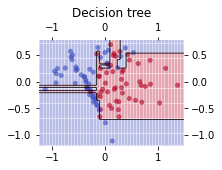

In [11]:
#####  TREE METHODS  ########
### 8. Decision tree
dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(xdf[['x1','x2']], xdf['y'])

Z = dtree.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:,1].reshape(xx.shape)

ax = plt.subplot2grid(gridsize, [3,0])
ax.title.set_text("Decision tree")
plotboundary(ax, Z)
plotcases(ax)


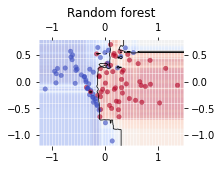

In [12]:
### 9. Random forest
rf = RandomForestClassifier()
rf.fit(xdf[['x1','x2']], xdf['y'])

Z = rf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:,1].reshape(xx.shape)

ax = plt.subplot2grid(gridsize, [3,1])
ax.title.set_text("Random forest")
plotboundary(ax, Z)
plotcases(ax)



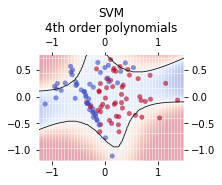

In [13]:
###### SUPPORT VECTOR MACHINES ###############
## 10. SVM with 4th order polynomials
svc2 = svm.SVC(kernel='poly',degree=4, probability=True)  
svc2.fit(xdf[['x1','x2']], xdf['y']) 

Z = svc2.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:,1].reshape(xx.shape)

ax = plt.subplot2grid(gridsize, [4,0])
ax.title.set_text("SVM\n4th order polynomials")
plotboundary(ax, Z)
plotcases(ax)


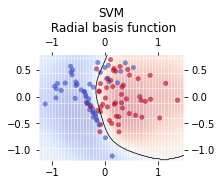

In [14]:

## 11. SVM with radial basis function
svc3 = svm.SVC(kernel='rbf', probability=True)  
svc3.fit(xdf[['x1','x2']], xdf['y']) 

Z = svc3.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:,1].reshape(xx.shape)

ax = plt.subplot2grid(gridsize, [4,1])
ax.title.set_text("SVM\n Radial basis function")
plotboundary(ax, Z)
plotcases(ax)




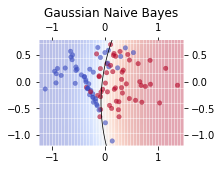

In [15]:
####### Bayesian & Probabilistic methods ############
### 12. Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(xdf[['x1','x2']], xdf['y'])

Z = gnb.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:,1].reshape(xx.shape)

ax = plt.subplot2grid(gridsize, [5,0])
ax.title.set_text("Gaussian Naive Bayes")
plotboundary(ax, Z)
plotcases(ax)


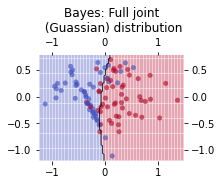

In [17]:
### 13. Gaussian Bayes, non-naive (joint distribution)
## Assumes multivariate normality 
# Specify prior: p(class). Assume that this is constant across all regions
pClass1 = len(xdf[xdf['y']==1]) / float(len(xdf))
pClass2 = len(xdf[xdf['y']==0]) / float(len(xdf))

## Create likelihood distribution: p(datapoint | class)
## For each class, determine mean and variance across both variables
# Collect means for both variables, for both classes
Mux1C1 = xdf['x1'][xdf['y']==1].mean()
Mux2C1 = xdf['x2'][xdf['y']==1].mean()
Mux1C2 = xdf['x1'][xdf['y']==0].mean()
Mux2C2 = xdf['x2'][xdf['y']==0].mean()

# Collect vars for both variables, for both classes
Varx1C1 = xdf['x1'][xdf['y']==1].std()
Varx2C1 = xdf['x2'][xdf['y']==1].std()
Varx1C2 = xdf['x1'][xdf['y']==0].std()
Varx2C2 = xdf['x2'][xdf['y']==0].std()

# use to create Normal distributions from these variables
rangex1 = np.linspace(xdf['x1'].min(), xdf['x1'].max(), num=100)
rangex2 = np.linspace(xdf['x2'].min(), xdf['x2'].max(), num=100)

# generate Gaussian distributions for x1 and x2 within both class1 and class2
C1x1 = np.array([stats.norm(Mux1C1, Varx1C1).pdf(i) for i in rangex1])
C1x2 = np.array([stats.norm(Mux2C1, Varx2C1).pdf(i) for i in rangex2])
C2x1 = np.array([stats.norm(Mux1C2, Varx1C2).pdf(i) for i in rangex1])
C2x2 = np.array([stats.norm(Mux2C2, Varx2C2).pdf(i) for i in rangex2])

# use this to create a joint likelihood distributions for class1 and class2: 
# These contain the joint probabilities for any given point whether it is in class1 or class2
pLikelihoodC1Joint = np.dot(C1x2[:, None], C1x1[None, :])
pLikelihoodC2Joint = np.dot(C2x2[:, None], C2x1[None, :])

# Finally, put them together to create the two posterior distributions: p(class | data)
ScoreClass1GivenData = pLikelihoodC1Joint * pClass1 / (sum(pLikelihoodC1Joint * pClass1) + sum(pLikelihoodC2Joint * pClass2))  
ScoreClass2GivenData = pLikelihoodC2Joint * pClass2 / (sum(pLikelihoodC1Joint * pClass1) + sum(pLikelihoodC2Joint * pClass2))

## for a given point, we calculate both likelihoods, and the max is the class we allocate to:
# eg ScoreClass1GivenData > ScoreClass2GivenData
Z = ScoreClass1GivenData > ScoreClass2GivenData
Z = Z.reshape(xx.shape)

ax = plt.subplot2grid(gridsize,[5,1])
ax.title.set_text("Bayes: Full joint\n (Guassian) distribution")
plotboundary(ax, Z)
plotcases(ax)

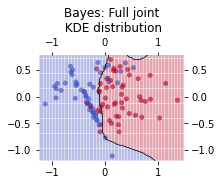

In [18]:

### 14. Bayes with joint, nonparametric (kernel density estimated) distributions
##  = Does NOT assume normality

# Specify prior: p(class). [same as above]

# Create likelihood distribution: p(datapoint | class) 
# = estimate distribution using Kernel Density 
dens_1 = sm.nonparametric.KDEMultivariate(data=xdf[['x1','x2']][xdf['y']==0], 
                                          var_type='cc', bw='normal_reference')

dens_2 = sm.nonparametric.KDEMultivariate(data=xdf[['x1','x2']][xdf['y']==1], 
                                          var_type='cc', bw='normal_reference')

# generate distributions for x1 and x2 within both class1 and class2
pLikelihoodC1Joint = dens_1.pdf(c_[xx.ravel(),yy.ravel()]) 
pLikelihoodC2Joint = dens_2.pdf(c_[xx.ravel(),yy.ravel()]) 

# Use Bayes rule to get posterior distribution, then convert back to matrix form
ScoreClass1GivenData = pLikelihoodC1Joint * pClass1 / (sum(pLikelihoodC1Joint * pClass1) + sum(pLikelihoodC2Joint * pClass2))
ScoreClass2GivenData = pLikelihoodC2Joint * pClass2 / (sum(pLikelihoodC1Joint * pClass1) + sum(pLikelihoodC2Joint * pClass2))

ScoreClass1GivenData = ScoreClass1GivenData.reshape(xx.shape)
ScoreClass2GivenData = ScoreClass2GivenData.reshape(xx.shape)

# predict most likely class at each point on grid
Z = ScoreClass1GivenData < ScoreClass2GivenData
Z = Z.reshape(xx.shape)

ax = plt.subplot2grid(gridsize, [5,2])
ax.title.set_text("Bayes: Full joint\n KDE distribution")
plotboundary(ax, Z)
plotcases(ax)


Epoch: 100; Error: 8.04366747744716;
Epoch: 200; Error: 7.264597006561065;
Epoch: 300; Error: 7.165914870894616;
Epoch: 400; Error: 7.099687986636671;
Epoch: 500; Error: 7.052248639003116;
The maximum number of train epochs is reached


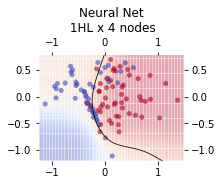

In [19]:

####### Neural Networks #########
## Nb. these take a while to train & the neurolab library can be a bit tempramental
## Can delete this chunk of code if desired
yarr = np.matrix(y).T

## Neural Net - 1HL,  3 hidden nodes
net3 = nl.net.newff([[np.min( X[:,0]), np.max( X[:,0])], [np.min( X[:,1]), np.max( X[:,1])]], [4, 1])
net3.trainf = nl.train.train_gd  # use gradient descent, bfgs is too buggy in neurolab
err = net3.train(X, yarr, show=100, goal=0.01)

Z = net3.sim(np.vstack([xx.ravel(), yy.ravel()]).T)
Z = Z.reshape(xx.shape)

ax = plt.subplot2grid(gridsize,[6,0])
ax.title.set_text("Neural Net\n 1HL x 4 nodes")
plotboundary(ax, Z)
plotcases(ax)


Epoch: 100; Error: 7.719591780431113;
Epoch: 200; Error: 6.0796845737785095;
Epoch: 300; Error: 5.737286927652061;
Epoch: 400; Error: 5.58416437389007;
Epoch: 500; Error: 5.436069944119716;
The maximum number of train epochs is reached


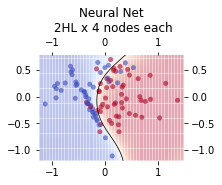

In [20]:
## Neural Net - 2HL,  4 hidden nodes eacg
net44 = nl.net.newff([[np.min( X[:,0]), np.max( X[:,0])], [np.min( X[:,1]), np.max( X[:,1])]], [4, 4, 1])
net44.trainf = nl.train.train_gd  # use gradient descent, bfgs is too buggy in neurolab
err = net44.train(X, yarr, show=100, goal=0.01, lr=0.01)

Z = net44.sim(np.vstack([xx.ravel(), yy.ravel()]).T)
Z = Z.reshape(xx.shape)

ax = plt.subplot2grid(gridsize,[6,1])
ax.title.set_text("Neural Net\n 2HL x 4 nodes each")
plotboundary(ax, Z)
plotcases(ax)